# Problem 1


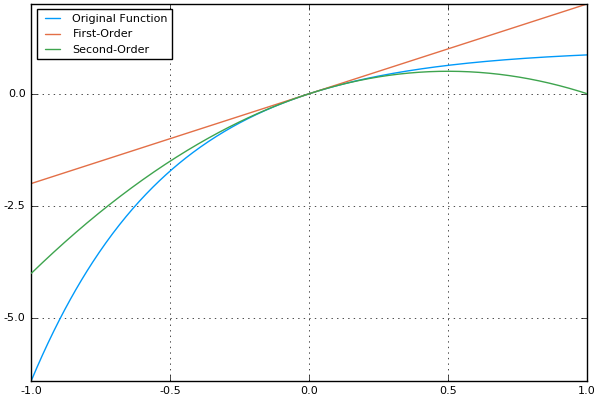

In [1]:
using Plots

x = linspace(-1, 1, 500)

# Function
y = 1 - exp(-2x)

# First-order
t1 = 2x

# Second-order
t2 = 2x - 2x.^2

plot(x, [y t1 t2], label=["Original Function" "First-Order" "Second-Order"])

# Problem 3

In [2]:
function fixed(x0, b, tol, maxit) 
    g(x, b) = 1 - b + b * x
    
    x = x0
    for i in 1:maxit
        x_old = copy(x)
        x = g(x, b)
        
        if abs(x - x_old) < tol || abs(1 - x_old/x) < tol
            break
        end
        
        if i == maxit
            x = "No convergence"
        end
    end
    return(x)
end

x0 = 0.5
b = [-2, 0, 1, 2]
tol = 1e-4
maxit = 1000
result = []

for i in b
    push!(result, fixed(0.5, i, tol, maxit))
end

println(result)

Any["No convergence",1.0,0.5,"No convergence"]


# Problem 4

In [3]:
function newton(f::Function, df::Function , x0)
    
    if x0 <= 0
        error("Need positive inital guess")
    end
    
    tol = 1e-4
    maxit = 10000

    x = x0
    for i in 1:maxit
        
        x_old = copy(x)
        x = x - f(x) / df(x)
        
        while x <= 0
            x = x_old + (x - x_old)/2
        end
    
        if abs(x - x_old) < tol || abs(1 - x_old/x) < tol
            break
        end
        
        if i == maxit
            x = "Reached maximum iteration"
        end
    end
    return(x)
end


f(x) = log(x)
df(x) = 1/x

newton(f, df , 11000)

0.9999999999998621

# Problem 5
## Excercises 3.3

In [4]:
using Distributions

function BSVal(S,K,tau,r,delta,sigma) 
    d = (log(exp(-delta*tau)*S)-log(exp(-r*tau)*K))/(sigma*sqrt(tau))+0.5*sigma*sqrt(tau) 
    V = exp(-delta*tau)*S*cdf(Normal(), d)-exp(-r*tau)*K*cdf(Normal(), d-sigma*sqrt(tau))
    return(V)
end

function ImpVol(S,K,tau,r,delta, V) 
    sigma = 1
    tol = 1e-3
    maxit = 1000

    function dBSVal(S,K,tau,r,delta,sigma)
        d = (log(exp(-delta*tau)*S)-log(exp(-r*tau)*K))/(sigma*sqrt(tau))+0.5*sigma*sqrt(tau)
        dV = S*exp(-delta*tau)*sqrt(tau/(2*pi))*exp(-0.5*d^2)
    end
    
    for i in 1:maxit
        ImpV = BSVal(S,K,tau,r,delta,sigma)
        dImpV = dBSVal(S,K,tau,r,delta,sigma)
        
        sigma = sigma - (ImpV - V)/dImpV 
        
        if abs(V - ImpV) < tol || abs(1 - ImpV/V) < tol
            break
        end
        
        if i == maxit
            sigma = "No convergence"
        end
    end
    return(sigma)
end

ImpVol(1, 1.1, 1, 0.08, 0, 0.0728)


0.20002397692365345

## Excercises 3.5

See problem3_5.m & fun.m

## Excercises 3.7

In [5]:
a = [2.0 1.5; 1.5 2.0; 1.5 2.0]
v = [-2.0 -0.5; -1.5 -0.5; -0.5 -1.5]
e = [2.0 3.0; 1.0 2.0; 4.0 0.0]

3×2 Array{Float64,2}:
 2.0  3.0
 1.0  2.0
 4.0  0.0